# predicting sales revenue of a firm using linear regression


In [2]:
# LOADING OF THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

## DATASET DESCRIPTION:

This dataset contains 10,000 records representing business data related to sales performance. It includes five key variables:

Advertising_Spend: The amount spent on advertising (in thousands of dollars).
Sales_Calls: The number of sales calls made.
Customer_Rating: A rating between 1 and 5, indicating customer satisfaction.
Discount_Offered: The percentage discount applied to sales.
Sales_Revenue: The total revenue generated from sales (in thousands of dollars).
The dataset reflects a typical business environment where sales revenue is influenced by marketing efforts, customer interactions, and pricing strategies.









In [3]:
# LOADING OF THE DATASET

df=pd.read_csv(r"E:\data analysis using python( jupytetr notebooks)\datasets\linear_regression_dataset_v2.csv")
df.head(10)

,Advertising_Spend,Sales_Calls,Customer_Rating,Discount_Offered,Sales_Revenue
0,57.450712,50,3,12.126025,75.615703
1,47.926035,72,4,0.463353,93.586720
2,59.715328,53,1,27.321872,69.317753
3,72.845448,57,4,20.297157,104.026703
4,46.487699,76,4,9.984412,50.038229
5,46.487946,23,2,26.435948,51.913226
6,73.688192,21,4,5.487889,112.427688
7,61.511521,31,3,2.362012,111.702431
8,42.957884,54,1,28.278647,35.194320
9,58.138401,89,2,9.270509,104.644083


## exploratory data analysis

In [4]:
df.shape

(10000, 5)

In [5]:
df.index

RangeIndex(start=0, stop=10000, step=1)

NAMES OF COLUMNS

In [6]:
df.columns

Index(['Advertising_Spend', 'Sales_Calls', 'Customer_Rating',
       'Discount_Offered', 'Sales_Revenue'],
      dtype='object')

ALL THE UNIQUE VALUES IN EACH COLUMN

In [7]:
df.nunique()

Advertising_Spend     9800
Sales_Calls             81
Customer_Rating          5
Discount_Offered      9900
Sales_Revenue        10000
dtype: int64

In [8]:
df.count()

Advertising_Spend     9800
Sales_Calls          10000
Customer_Rating      10000
Discount_Offered      9900
Sales_Revenue        10000
dtype: int64

THE NUMBER OF NULL VALUES IN EACH COLUMN

In [9]:
df.isnull().sum()

Advertising_Spend    200
Sales_Calls            0
Customer_Rating        0
Discount_Offered     100
Sales_Revenue          0
dtype: int64

INFORMATION ABOUT THE DATASET

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Advertising_Spend  9800 non-null   float64
 1   Sales_Calls        10000 non-null  object 
 2   Customer_Rating    10000 non-null  int64  
 3   Discount_Offered   9900 non-null   float64
 4   Sales_Revenue      10000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB


In [11]:
df.describe()

,Advertising_Spend,Customer_Rating,Discount_Offered,Sales_Revenue
count,9800.000000,10000.000000,9900.000000,10000.000000
mean,49.948971,3.167800,14.891320,70.261089
std,15.049866,1.191883,8.655386,33.554626
min,-8.836004,1.000000,0.003071,-35.914064
25%,39.896518,2.000000,7.477221,51.111916
50%,49.890922,3.000000,14.874680,68.825071
75%,60.066213,4.000000,22.338725,87.457464
max,108.893566,5.000000,29.996991,668.464055


## DATA CLEANING

### removing duplicates

In [12]:
df.drop_duplicates()

,Advertising_Spend,Sales_Calls,Customer_Rating,Discount_Offered,Sales_Revenue
0,57.450712,50,3,12.126025,75.615703
1,47.926035,72,4,0.463353,93.586720
2,59.715328,53,1,27.321872,69.317753
3,72.845448,57,4,20.297157,104.026703
4,46.487699,76,4,9.984412,50.038229
...,...,...,...,...,...
9995,69.516531,44,3,14.487127,89.642486
9996,20.024825,88,4,10.828276,66.558845
9997,39.420249,90,2,18.329683,46.211874
9998,57.436484,42,3,3.059574,85.360389


### replacing missing values with the median of the column

In [13]:
df['Advertising_Spend']= df['Advertising_Spend'].fillna(df['Advertising_Spend'].median())
df['Discount_Offered']=df['Discount_Offered'].fillna(df['Discount_Offered'].median())

## replacing "missing" in sales_calls column with a value

In [14]:
df['Sales_Calls']=pd.to_numeric(df['Sales_Calls'], errors='coerce')
df["Sales_Calls"]=df['Sales_Calls'].fillna(df['Sales_Calls'].median())

COVERTING DISCOUNT_OFFERED COLUMN FROM OBJECT TO NUMERIC

In [15]:
df['Discount_Offered']=pd.to_numeric(df['Discount_Offered'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Advertising_Spend  10000 non-null  float64
 1   Sales_Calls        10000 non-null  float64
 2   Customer_Rating    10000 non-null  int64  
 3   Discount_Offered   10000 non-null  float64
 4   Sales_Revenue      10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


# LINEAR REGRESSION PREDICTIVE MODELLING

## checking for outliers in sales revenue

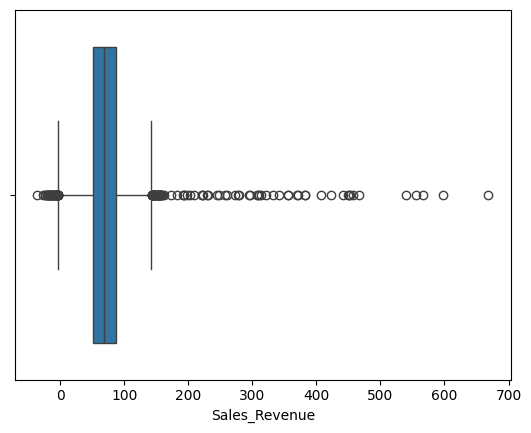

In [17]:
sns.boxplot(x=df['Sales_Revenue'])
plt.show()

In [18]:
Q1 = df["Sales_Revenue"].quantile(0.25)
Q3 = df["Sales_Revenue"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df["Sales_Revenue"] < lower_bound) | (df["Sales_Revenue"] > upper_bound)]
print(outliers)
outliers.count()

      Advertising_Spend  Sales_Calls  ...  Discount_Offered  Sales_Revenue
16            34.807533         90.0  ...          4.436356     294.900037
37            20.604948         27.0  ...         29.344345      -7.020503
209          107.790972         97.0  ...          8.103786     158.115677
262            1.380990         34.0  ...         18.484339     -19.457619
348           39.223337         34.0  ...          8.376594     310.889419
...                 ...          ...  ...               ...            ...
9553          46.602088         30.0  ...         12.837702     245.185530
9630          80.066350         85.0  ...         19.598518     143.564949
9770          -8.836004         54.0  ...          3.337484      -7.204499
9818          33.659860         79.0  ...          7.572640     277.545342
9941          77.022926         45.0  ...         14.269393     142.877551

[129 rows x 5 columns]


Advertising_Spend    129
Sales_Calls          129
Customer_Rating      129
Discount_Offered     129
Sales_Revenue        129
dtype: int64

## removing outliers from our dataset

In [45]:
Q1=df['Sales_Revenue'].quantile(0.25)
Q3=df['Sales_Revenue'].quantile(0.75)
IQR= Q3-Q1

# Define lower and upper bound
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# Removing outliers
df=df[(df['Sales_Revenue']>=lower_bound) & (df['Sales_Revenue']<=upper_bound)]

CONFIRMING THAT WE HAVE REMOVED THE OUTLIERS

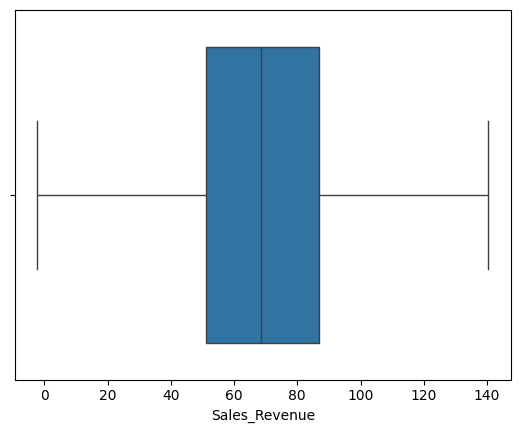

In [46]:
sns.boxplot(x=df['Sales_Revenue'])
plt.show()

## checking for correlation in the dataset

In [21]:
corr_matrix= df.select_dtypes(include='number').corr()
corr_matrix

,Advertising_Spend,Sales_Calls,Customer_Rating,Discount_Offered,Sales_Revenue
Advertising_Spend,1.000000,-0.011288,0.013332,0.035147,0.808223
Sales_Calls,-0.011288,1.000000,-0.000556,0.001733,0.160094
Customer_Rating,0.013332,-0.000556,1.000000,0.011451,0.000386
Discount_Offered,0.035147,0.001733,0.011451,1.000000,-0.366032
Sales_Revenue,0.808223,0.160094,0.000386,-0.366032,1.000000


### correlation heatmap

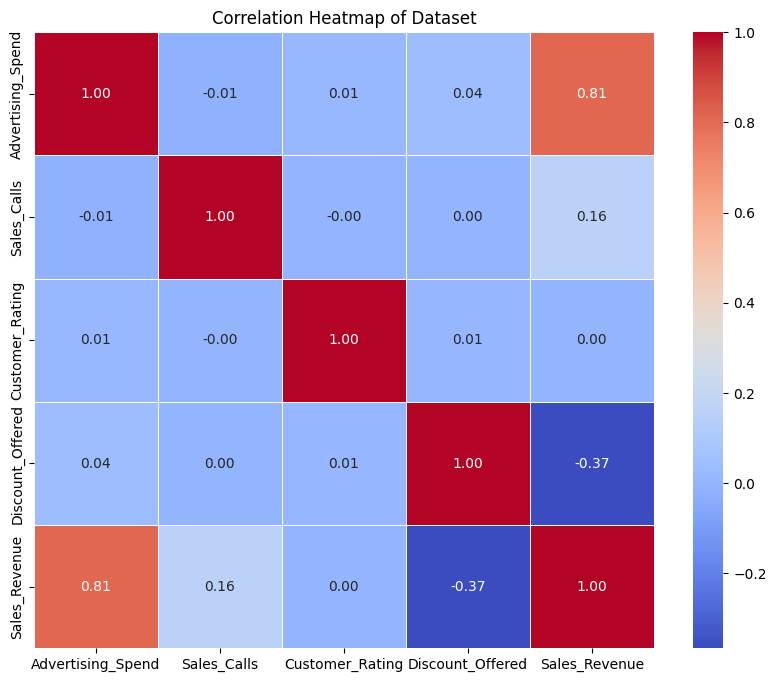

In [22]:
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Dataset")
plt.show()

### **Explanation of the Heatmap in Relation to Sales Revenue**  

The heatmap displays the correlation between different variables in your dataset. Correlation values range from **-1 to 1**:  
- **1 (or close to 1)** → Strong positive correlation  
- **0** → No correlation  
- **-1 (or close to -1)** → Strong negative correlation  

#### **Key Observations on `Sales_Revenue`:**  
1. **Advertising_Spend (0.81) → Strong Positive Correlation**  
   - This means that **higher spending on advertising is strongly associated with higher sales revenue**.  
   - Investing more in ads leads to increased revenue.  

2. **Sales_Calls (0.16) → Weak Positive Correlation**  
   - There is **a weak relationship between the number of sales calls and revenue**.  
   - While sales calls help, they don't significantly impact revenue.  

3. **Customer_Rating (-0.00) → No Correlation**  
   - Customer ratings **do not impact sales revenue** in this dataset.  
   - This might indicate that customer satisfaction does not directly translate into immediate revenue.  

4. **Discount_Offered (-0.36) → Moderate Negative Correlation**  
   - **Higher discounts tend to reduce revenue**.  
   - This suggests that while discounts attract customers, they reduce overall sales revenue.  



## splitting our dataset into train and test 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df[['Advertising_Spend','Sales_Calls','Discount_Offered']]
y=df['Sales_Revenue']

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)


## training the model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm=LinearRegression()

In [28]:
if len(x_train.shape) == 1:
    x_train = x_train.reshape(-1, 1)

In [29]:
df.dtypes

Advertising_Spend    float64
Sales_Calls          float64
Customer_Rating        int64
Discount_Offered     float64
Sales_Revenue        float64
dtype: object

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

OBTAINING THE COEFFICIENTS FOR OUR INDEPENDENT VARIABLES

In [31]:
lm.coef_

array([ 1.47107846,  0.19047239, -1.19641914])

In [56]:
cdf=pd.DataFrame(lm.coef_,x.columns, columns=['coef_'])
cdf

,coef_
Advertising_Spend,1.471078
Sales_Calls,0.190472
Discount_Offered,-1.196419


The Intercept and predicts where the regression line will cross the y -axis

In [33]:
lm.intercept_

np.float64(1.9406248394222416)

## Training the model with multivariable regression using OLS
Allows us to get more details about the model

In [34]:
import statsmodels.api as sm

X = sm.add_constant(x_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          Sales_Revenue   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:32:15   Log-Likelihood:                -25968.
No. Observations:                6909   AIC:                         5.194e+04
Df Residuals:                    6905   BIC:                         5.197e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9406      0.59

## Predictions

In [35]:
predictions=lm.predict(x_test)
predictions

array([ 86.06258178,  74.70571822,  73.28861143, ..., 102.57396082,
        96.10188675,  61.86936589])

## scatter plot of predictions against y_test

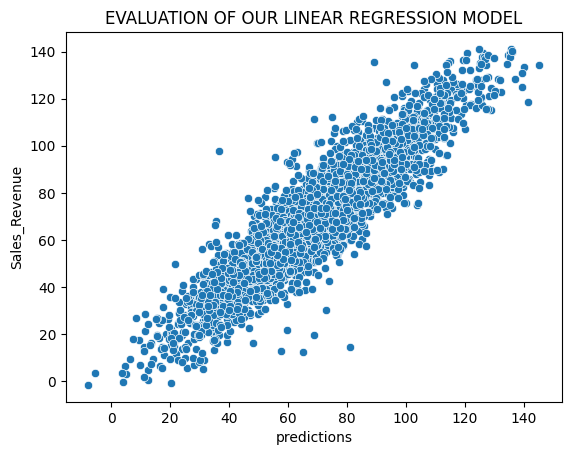

In [36]:
sns.scatterplot(x=predictions,y=y_test)
plt.xlabel('predictions')
plt.title('EVALUATION OF OUR LINEAR REGRESSION MODEL')
plt.show()

## evaluating the model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [54]:
print('mean_absolute_error:',mean_absolute_error(y_test, predictions))
print('mean_squared_error:',mean_squared_error(y_test,predictions))
print('RSME:',math.sqrt(mean_squared_error(y_test,predictions)))

mean_absolute_error: 8.355553301939
mean_squared_error: 114.45530561854687
RSME: 10.698378644380973


1. Mean Absolute Error (MAE) – 8.36K
This means that, on average, the model’s predictions are off by approximately $8,360 in sales revenue.
A lower MAE indicates a better model fit.
2. Mean Squared Error (MSE) – 114.46
This represents the average of the squared differences between actual and predicted values.
Since it squares the errors, it penalizes larger errors more than smaller ones.
While useful, it’s harder to interpret because it’s in squared units.
3. Root Mean Squared Error (RMSE) – 10.70K
This is the square root of MSE, which brings it back to the original unit (thousands of dollars).
It means that, on average, the model's predictions deviate from actual sales revenue by $10,700.
RMSE is a more interpretable error metric compared to MSE.
What Does This Mean for Your Model?
✅ Decent Prediction Accuracy: The model is fairly accurate but has an average error of about $8,360–$10,700 in sales revenue.

## In linear regression all the residuals assume a normal distribution

In [39]:
residuals=y_test-predictions
residuals

9325     2.847845
4357   -16.152786
4333     8.597914
3436   -11.012518
7980    25.151901
          ...    
9105    -3.330539
6470     9.314028
826    -11.416754
2443    24.528566
5327     5.634353
Name: Sales_Revenue, Length: 2962, dtype: float64

A HISTOGRAM SHOWING NORMAL DISTRIBUTION IN TH RESIDUALS

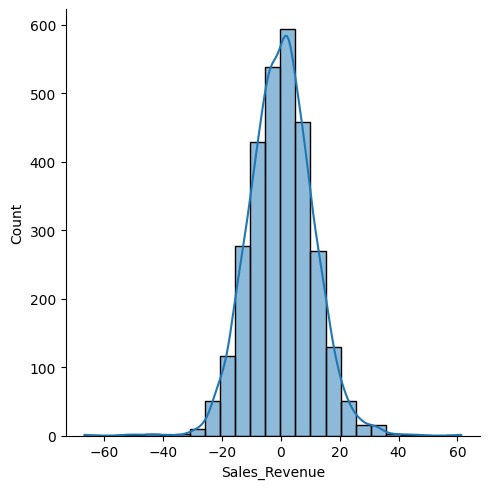

In [40]:
sns.displot(residuals, bins=25, kde=True)

## the probability plot of a normal distribution shouuld assume a straight line

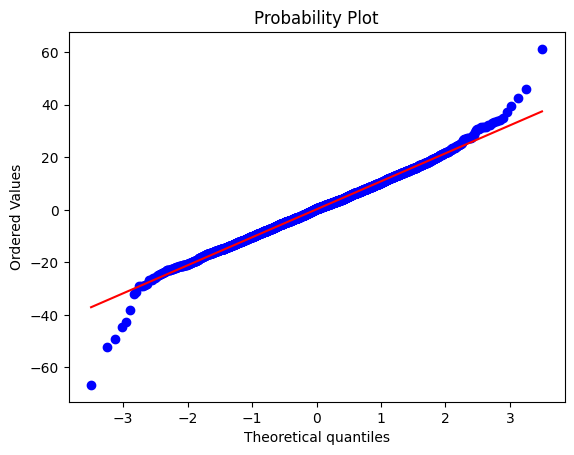

In [55]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

THE R-SQUARED SCORE (a statistical measure of how well the regression line approximates the actual data.)

In [53]:
# Get R² score on the test data
r2_score = lm.score(x_test, y_test)
print("R² Score:", r2_score)

R² Score: 0.8315002180768465


### **Conclusion for the Firm Based on the Regression Model**  

Your regression model provides key insights into how different factors impact **Sales Revenue**. Here’s what your results indicate:  

#### **1. Impact of Features on Sales Revenue (Regression Coefficients)**  
| Feature | Coefficient | Interpretation |
|----------|-------------|--------------------------------------------------|
| **Advertising_Spend** | **1.469** | A **$1,000 increase** in advertising spend increases sales revenue by **$1,469**. Advertising has a **strong positive effect** on revenue. |
| **Sales_Calls** | **0.195** | A **1 extra sales call** increases revenue by **$195**. Sales calls contribute positively but have a smaller impact than advertising. |
| **Discount_Offered** | **-1.180** | A **1% increase in discounts** reduces revenue by **$1,180**. Discounts have a **negative effect** on revenue. |

#### **2. Model Performance (Error Metrics)**
- **Mean Absolute Error (MAE)**: **$7.99K** → On average, predictions are off by about **$7,990**.  
- **Mean Squared Error (MSE)**: **103.10** → Measures variance; lower is better.  
- **Root Mean Squared Error (RMSE)**: **$10.15K** → Typical prediction error is around **$10,150**.  
- **R² Score**: **0.847** → The model explains **84.7% of the variance** in sales revenue, meaning it is a **strong predictor** of revenue trends.  

#### **3. Business Recommendations**
✅ **Increase Advertising Spend**  
   - Since **Advertising Spend** has the largest positive impact, **investing more in ads** can significantly boost revenue.  

✅ **Optimize Sales Calls Strategy**  
   - **Sales Calls** have a positive impact, but it’s **weaker than advertising**.  
   - Focus on **improving call quality** rather than just increasing call volume.  

❌ **Reduce Unnecessary Discounts**  
   - Discounts **negatively impact revenue**.  
   - The firm should **rethink pricing strategies** and offer **targeted discounts** rather than general price cuts.  

### **Final Verdict**  
The model has an **R² Score of 0.847**, meaning it explains **84.7% of sales revenue variations**, making it a **highly reliable model** for prediction. The company should **prioritize advertising and refine discount strategies** while maintaining an effective sales call approach.  
